<a id='sect0'></a>
## <font color='darkblue'>Preface</font>
([article source](https://www.kaggle.com/agungor2/various-confusion-matrix-plots)) <font size='3ptx'>**In a typical supervised learning problem setting, confusion matrix is used to layout the performance of an algorithm.**</font>

By looking at the confusion matrix, we can understand how well the algorithm works for specific class of choosing. It's commonly used to describe the performance of a classification model. **I wanted to create a quick reference guide and include various different libraries to plot confusion matrix so that you can use any one of them in your workload.**

### <font color='darkgreen'>Table of Content:</font>
0. <font size='3ptx'>[**Introduction of Confusion Matrix**](#cm)</font>
  * [Classification Accuracy](#accuracy)
  * [Classification Error](#classification_error)
  * [Sensitivity](#sensitivity)
  * [Specificity](#specificity)
  * [False Positive Rate](#fpr)
  * [Precision](#precision)
1. <font size='3ptx'>[**Seaborn Heatmap**](#sect1)</font>
2. <font size='3ptx'>[**Seaborn Heatmap More Analysis**](#sect2)</font>
3. <font size='3ptx'>[**Interactive Plotting with Pygal**](#sect3)</font>
4. <font size='3ptx'>[**Interactive Plotting with Altair**](#sect4)</font>
5. <font size='3ptx'>[**Pandas Confusion Matrix**](#sect5)</font>
6. <font size='3ptx'>[**Scikit-plot Confusion Matrix**](#sect6)</font>

<a id='cm'></a>
## <font color='darkblue'>Introduction of Confusion Matrix</font>
Let's use a simple example to demonstrate the usage of [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Here we will use dataset [Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository:

In [38]:
# read the data into a pandas DataFrame
import pandas as pd
from sklearn import metrics

path = '../../datas/kaggle_pima-indians-diabetes-database/diabetes.csv'
pima = pd.read_csv(path)

In [30]:
# print the first 5 rows of data
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# define X and y
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = pima[feature_cols]
y = pima.Outcome

In [34]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

Now let's explore termologies used in Confusion Matrix:

In [39]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


![1.png](images/1.png)
<br/>
**Basic terminology**
- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [40]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

<a id='accuracy'></a>
### <font color='darkgreen'>Classification Accuracy</font>
Overall, how often is the classifier correct?

In [41]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


<a id='classification_error'></a>
### <font color='darkgreen'>Classification Error</font>
Overall, how often is the classifier incorrect? (Also known as "Misclassification Rate")

In [42]:
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


<a id='sensitivity'></a>
### <font color='darkgreen'>Sensitivity</font>
When the actual value is positive, how often is the prediction correct?
* How "sensitive" is the classifier to detecting positive instances?
* Also known as "True Positive Rate" or "Recall"

In [43]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


<a id='specificity'></a>
### <font color='darkgreen'>Specificity</font>
When the actual value is negative, how often is the prediction correct?
* How "specific" (or "selective") is the classifier in predicting positive instances?

In [44]:
print(TN / (TN + FP))

0.9076923076923077


<a id='fpr'></a>
### <font color='darkgreen'>False Positive Rate</font>
When the actual value is negative, how often is the prediction incorrect?

In [45]:
print(FP / (TN + FP))

0.09230769230769231


<a id='precision'></a>
### <font color='darkgreen'>Precision</font>
When a positive value is predicted, how often is the prediction correct?
* How "precise" is the classifier when predicting positive instances?

In [46]:
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


<a id='sect1'></a>
## <font color='darkblue'>1. Seaborn Heatmap</font> ([back](#sect0))

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

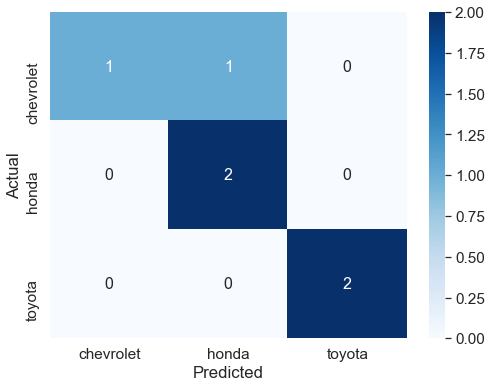

In [48]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true = ["honda", "chevrolet", "honda", "toyota", "toyota", "chevrolet"]
y_pred = ["honda", "chevrolet", "honda", "toyota", "toyota", "honda"]
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,6))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

<a id='sect2'></a>
## <font color='darkblue'>2. Seaborn Heatmap More Analysis</font> ([back](#sect0))

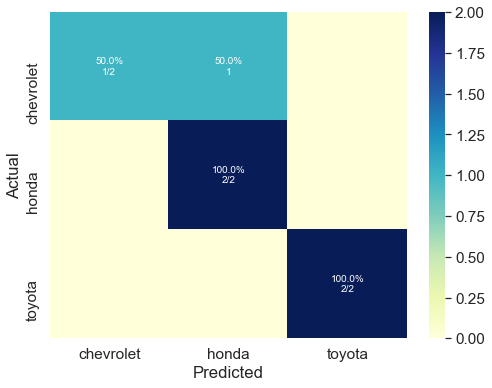

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(8, 6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_true, y_pred)

<a id='sect3'></a>
## <font color='darkblue'>3. Interactive Plotting with Pygal </font> ([back](#sect0))
Dependecies : [**pygal**](http://www.pygal.org/en/stable/)

In [4]:
#!pip -q install pygal

In [5]:
import pygal
from IPython.display import display, HTML
from pygal.style import RedBlueStyle

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
def plot_cm(y_true, y_pred):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    dot_chart = pygal.Dot(x_label_rotation=30, interpolate='cubic', style=RedBlueStyle)
    dot_chart.title = 'Confusion Matrix'
    dot_chart.x_labels = labels
    dot_chart.x_title = "Predicted"
    dot_chart.y_title = "Actual"
    for i in range(len(labels)):
        dot_chart.add(labels[i], cm[i,:])
    galplot(dot_chart)
    
plot_cm(y_true, y_pred)

<a id='sect4'></a>
## <font color='darkblue'>4. Interactive Plotting with Altair </font> ([back](#sect0))

Dependecies : [**altair**](https://altair-viz.github.io/), [**notebook**](https://pypi.org/project/notebook/), [**vega**](https://vega.github.io/vega/)

In [10]:
!pip install -q -U altair notebook vega

In [11]:
from itertools import product
import altair as alt
alt.renderers.enable('notebook')

labels = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm = [y for i in cm for y in i]
roll = list(product(np.unique(y_true), repeat = 2))
columns = ["actual", "predicted", "confusion_matrix"]
df = pd.DataFrame(columns=columns)
for i in range(len(roll)):
    df = df.append({'actual':roll[i][0], 'predicted':roll[i][1], 'confusion_matrix':cm[i]}, ignore_index=True)
    
#plot figure
def make_example(selector):
    return alt.Chart(df).mark_rect().encode(
        x="predicted:N",
        y="actual:N",
        color=alt.condition(selector, 'confusion_matrix', alt.value('lightgray'))
    ).properties(
        width=600,
        height=480
    ).add_selection(
        selector
    )

interval_x = alt.selection_interval(encodings=['x'], empty='none')
make_example(interval_x)

<a id='sect5'></a>
## <font color='darkblue'>5. Pandas Confusion Matrix</font> ([back](#sect0))
Dependencies: [**pandas-ml**](https://pypi.org/project/pandas-ml/)

In [15]:
#!pip install -q pandas-ml

In [19]:
# https://github.com/pandas-ml/pandas-ml/issues/127
#   sklearn.preprocessing.Imputer has been removed in 0.22.
%matplotlib inline
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(y_true, y_pred)
#confusion_matrix.plot(normalized=True)

<a id='sect6'></a>
## <font color='darkblue'>6. Scikit-plot Confusion Matrix </font> ([back](#sect0))
Dependencies: [**scikit-plot**](https://pypi.org/project/scikit-plot/)

In [13]:
#!pip install -q scikit-plot

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

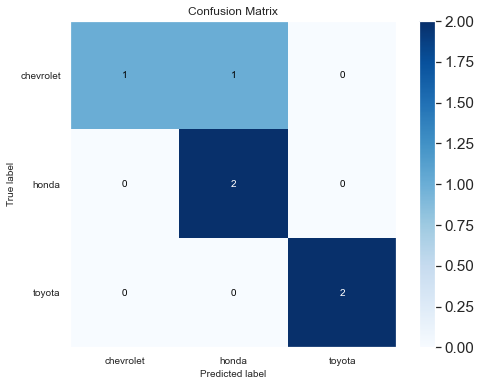

In [51]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(8, 6)
)

## <font color='darkblue'>Supplement</font>
* [Introduction to Machine Learning with scikit-learn by Kevin Markham - Lesson 9](https://courses.dataschool.io/courses/introduction-to-machine-learning-with-scikit-learn/693291-9-evaluating-a-classification-model/1977140-lesson-9)
> Topics covered: <br/>
> * What is the purpose of model evaluation, and what are some common evaluation procedures?
> * What is the usage of classification accuracy, and what are its limitations?
> * How does a confusion matrix describe the performance of a classifier?
> * What metrics can be computed from a confusion matrix?
> * How can you adjust classifier performance by changing the classification threshold?
> * What is the purpose of an ROC curve?
> * How does Area Under the Curve (AUC) differ from classification accuracy?